# Visualization of NYC Yellow Taxi Trip Summary (Jan 2023 - Mar 2023)

In [54]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Setup
sns.set(style="whitegrid")
PROJECT_ROOT = Path("..")
SUMMARY_PATH = PROJECT_ROOT / "airflow_pipeline" / "data" / "processed" / "trip_summary_hourly.csv"

# Read csv and parse pickup_hour as datetime
df = pd.read_csv(SUMMARY_PATH, parse_dates=["pickup_hour"]) 
df.head()

,pickup_hour,trip_count,avg_fare,avg_tip,total_passengers,avg_distance,avg_total_amount,avg_duration_min
0,2023-01-01 00:00:00,5217,18.94,3.45,7753.0,3.39,27.435576,18.045454
1,2023-01-01 01:00:00,5561,18.72,3.51,8062.0,3.35,27.218675,17.673581
2,2023-01-01 02:00:00,4944,18.37,3.46,6948.0,3.44,26.793956,17.534884
3,2023-01-01 03:00:00,3804,18.90,3.36,5004.0,3.61,27.200815,16.449330
4,2023-01-01 04:00:00,2381,20.08,3.31,3225.0,3.98,28.495120,15.952233


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pickup_hour       2160 non-null   datetime64[ns]
 1   trip_count        2160 non-null   int64         
 2   avg_fare          2160 non-null   float64       
 3   avg_tip           2160 non-null   float64       
 4   total_passengers  2160 non-null   float64       
 5   avg_distance      2160 non-null   float64       
 6   avg_total_amount  2160 non-null   float64       
 7   avg_duration_min  2160 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 135.1 KB


In [56]:
df.describe()

,pickup_hour,trip_count,avg_fare,avg_tip,total_passengers,avg_distance,avg_total_amount,avg_duration_min
count,2160,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,2023-02-14 23:43:16.666666496,4249.263889,19.992019,3.524384,5630.307870,4.833472,28.963743,15.995753
min,2023-01-01 00:00:00,2.000000,14.690000,2.300000,8.000000,2.210000,21.933263,10.299303
25%,2023-01-23 11:45:00,1808.500000,17.670000,3.220000,2318.000000,3.150000,26.145317,14.486374
50%,2023-02-14 23:30:00,4994.500000,18.850000,3.450000,6412.500000,3.560000,27.667814,15.865837
75%,2023-03-09 11:15:00,6124.500000,20.865000,3.700000,8306.000000,4.600000,30.164643,17.219403
max,2023-04-01 00:00:00,9385.000000,39.600000,6.170000,12558.000000,520.140000,52.510356,26.763441
std,NaN,2390.775241,3.648630,0.457469,3204.499882,12.744628,4.447685,2.187722


In [57]:
# Create column for hour of day (0-23)
df["pickup_hour_of_day"] = df["pickup_hour"].dt.hour

# Group by hour of day for additional indicators
hourly_avg = df.groupby("pickup_hour_of_day").agg({
    "trip_count": "mean",
    "avg_fare": "mean",
    "avg_tip": "mean",
    "total_passengers": "mean",
    "avg_distance": "mean"
}).reset_index()

### Hourly Trip Volume

This chart shows the number of taxi trips per hour across January 2023 - March 2023. Regular daily peaks and lows can reflect commute patterns, nightlife activity, or weekend behavior.

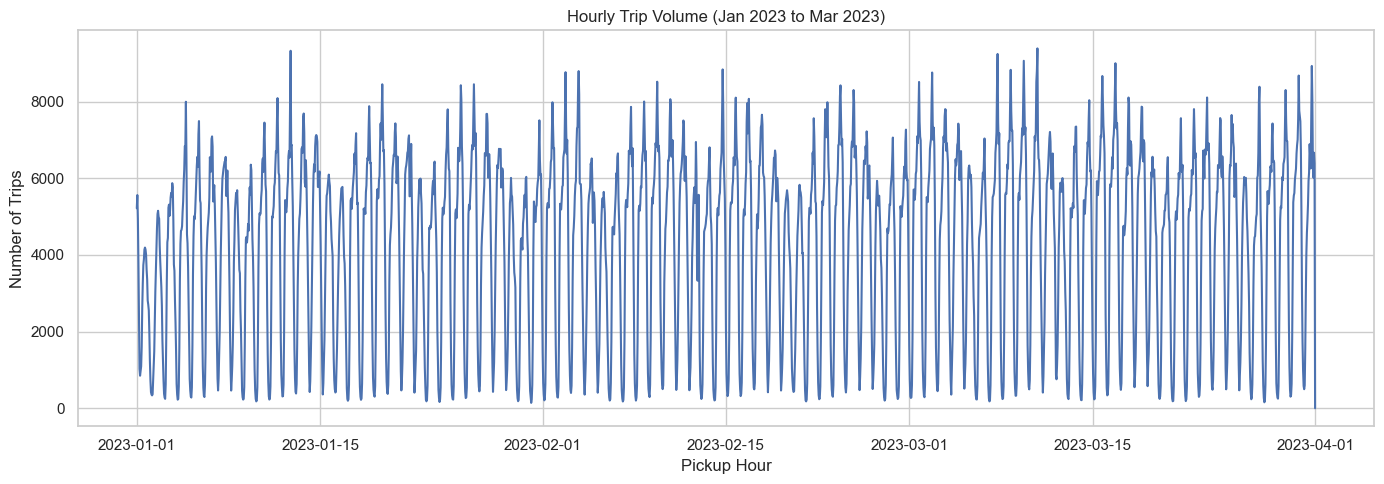

In [58]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x="pickup_hour", y="trip_count")

plt.title("Hourly Trip Volume (Jan 2023 to Mar 2023)")
plt.xlabel("Pickup Hour")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.grid(True)
plt.show()

We observe a consistent daily rhythm in trip volume, with regular peaks and troughs throughout the month. These fluctuations likely correspond to typical commuting patterns on weekdays versus more varied travel behavior on weekends.


### Average Fare Over Time

This chart displays the average total fare amount per trip, measured hourly. It helps identify pricing fluctuations, potential surcharges during peak times, or fare dips during off-hour.


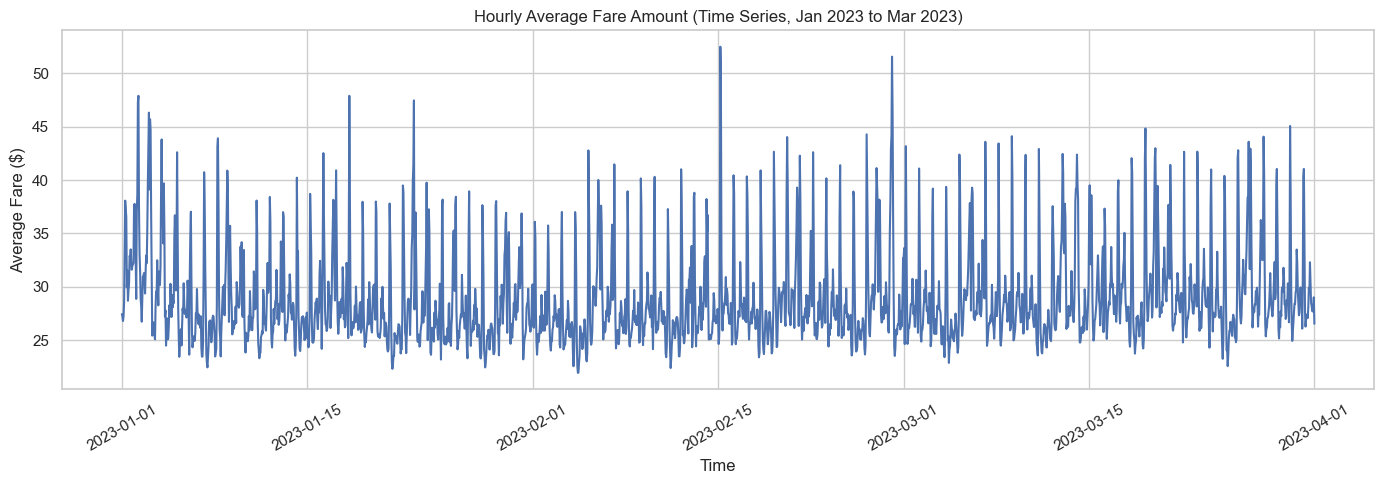

In [59]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x="pickup_hour", y="avg_total_amount")

plt.title("Hourly Average Fare Amount (Time Series, Jan 2023 to Mar 2023)")
plt.xlabel("Time")
plt.ylabel("Average Fare ($)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(True)
plt.show()

The average fare fluctuates noticeably across the month, with some spikes likely driven by longer trips, special surcharges, or variations in trip patterns.


While this time series reveals fare changes over time, it doesn't capture hourly dynamics. To explore which hours are typically more expensive, we’ll take a closer look at the next chart.


### Average Fare by Hour of Day

This plot shows the average fare amount grouped by the hour of day, across the entire month. It helps highlight whether certain time windows—like early mornings or late nights—tend to have higher fares on average.

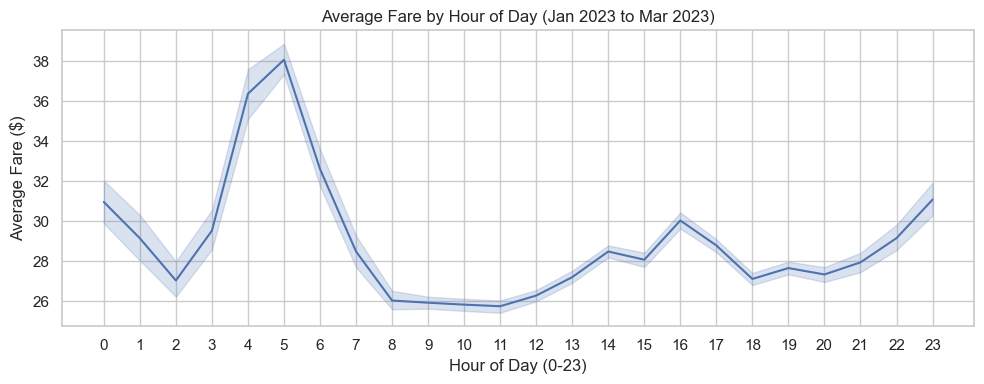

In [60]:
# Extract hour of day
df["hour_of_day"] = df["pickup_hour"].dt.hour

# Plot average fare by hour of day
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x="hour_of_day", y="avg_total_amount")

plt.title("Average Fare by Hour of Day (Jan 2023 to Mar 2023)")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Average Fare ($)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Late-night hours — especially between 1am and 4am — tend to see higher fares. This may be due to night-time pricing policies or a greater proportion of longer trips during these times.


### Average Trip Duration Over Time

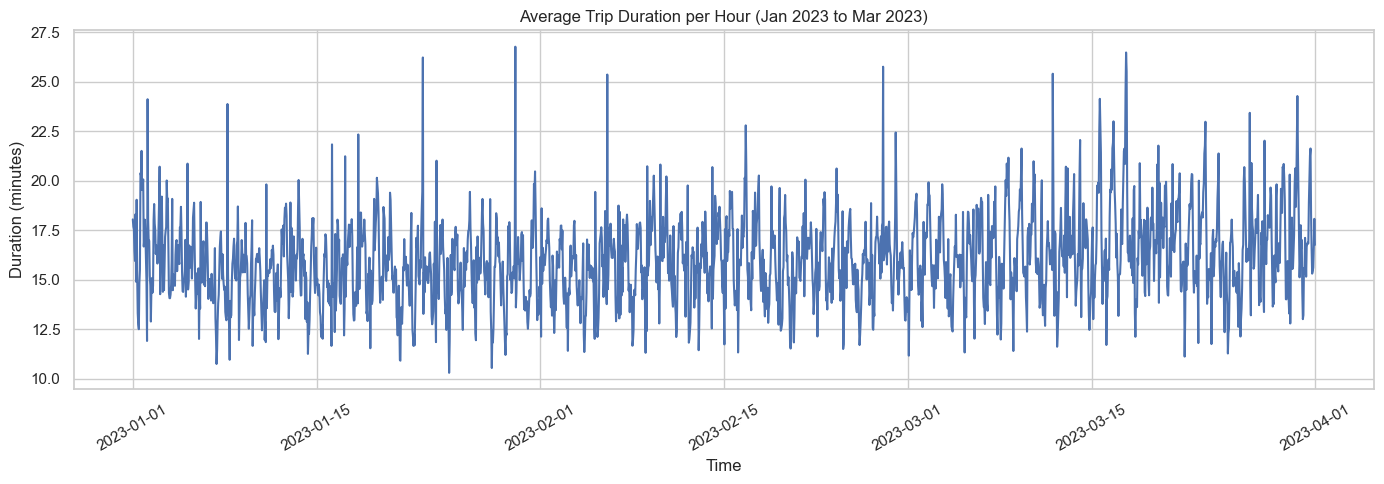

In [61]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x="pickup_hour", y="avg_duration_min")

plt.title("Average Trip Duration per Hour (Jan 2023 to Mar 2023)")
plt.xlabel("Time")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(True)
plt.show()

Trip durations appear generally stable across the three-month period, typically hovering between 14 to 18 minutes. However, several sharp peaks emerge intermittently — likely caused by unusually long trips or one-off disruptions, such as road closures or severe weather conditions.

While there's no strong seasonal trend, the occasional spikes might suggest local traffic congestion or delays affecting specific days. It may be worth examining those specific timestamps further if operational planning is involved.

### Average Trip Duration by Hour of Day

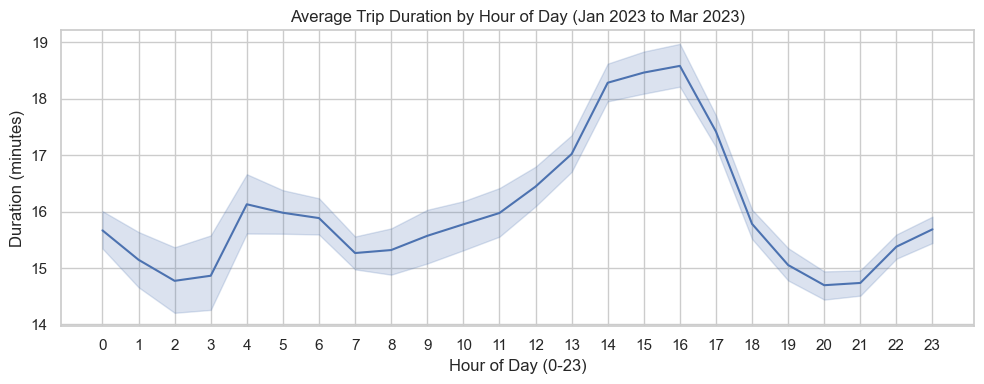

In [62]:
# Group by hour of day (already exists from earlier step)
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x="hour_of_day", y="avg_duration_min")

plt.title("Average Trip Duration by Hour of Day (Jan 2023 to Mar 2023)")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Duration (minutes)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Trip durations tend to be longer during two distinct periods: early mornings around 4–5am, and late afternoons between 3–5pm.


The early morning spike may reflect longer-distance airport rides or reduced traffic allowing for more spread-out trips, while the afternoon peak likely aligns with post-school or post-work travel congestion.

In contrast, durations dip noticeably in the evening, especially between 8–9pm, perhaps reflecting shorter, routine trips.

### Additional Metrics (Tip, Passengers, Distance)

Beyond fare and duration, this section explores further indicators like average tips, passenger count, and trip distance, both over time and by hour of day.

#### **Hourly trend - trip count**

This plot shows how total ride volume fluctuates by hour from January to March 2023.
It can help surface demand peaks, such as morning/evening rush hours or late-night lows.

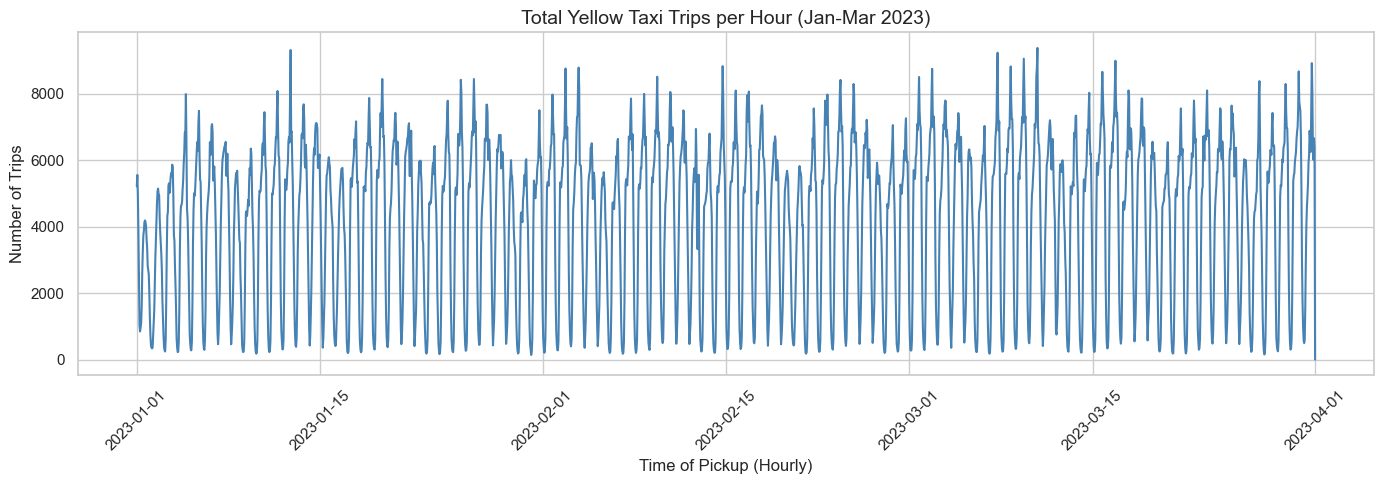

In [63]:
# Plot hourly trip count over time
plt.figure(figsize=(14, 5))
plt.plot(df["pickup_hour"], df["trip_count"], label="Trip count", color="steelblue")
plt.title("Total Yellow Taxi Trips per Hour (Jan-Mar 2023)", fontsize=14)
plt.xlabel("Time of Pickup (Hourly)", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Average trip count by hour of day**

This chart shows the mean number of trips across each year of the day. The values are averaged across all days in the dataset.

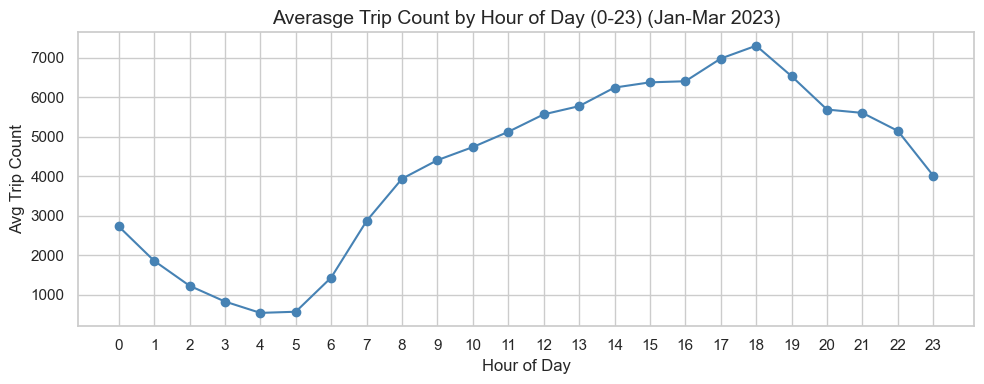

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(hourly_avg["pickup_hour_of_day"], hourly_avg["trip_count"], marker='o', color="steelblue")
plt.title("Average Trip Count by Hour of Day (0-23) (Jan-Mar 2023)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Avg Trip Count", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Hourly trend – average fare**

This plot shows the average fare value at each pickup hour across the entire dataset.
The x-axis uses full timestamps, making it possible to observe how fare levels change over time.

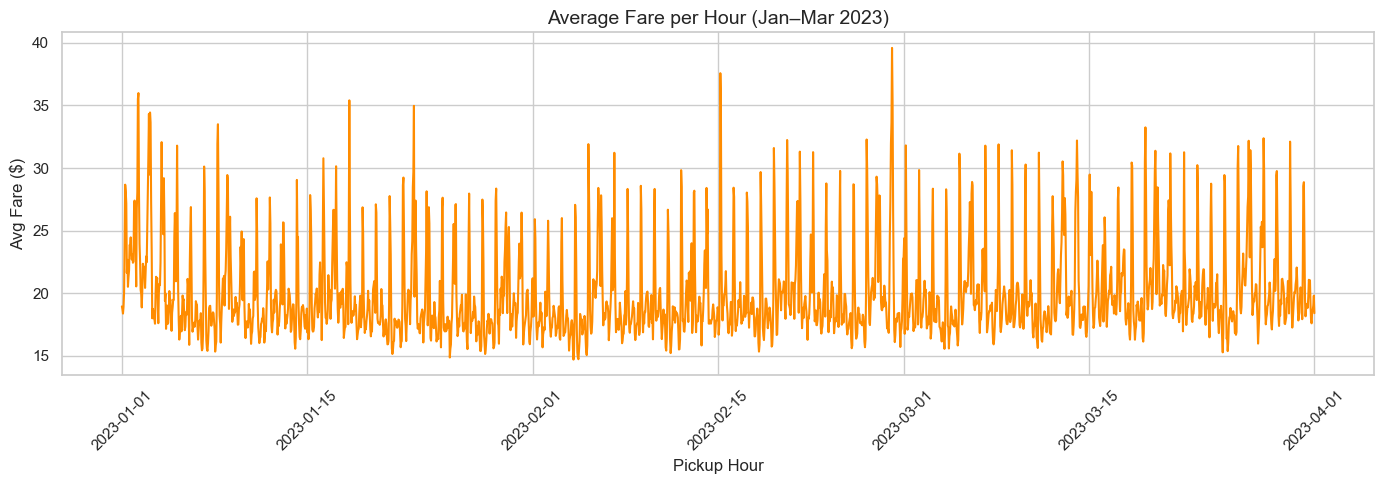

In [65]:
plt.figure(figsize=(14, 5))
plt.plot(df["pickup_hour"], df["avg_fare"], color="darkorange")
plt.title("Average Fare per Hour (Jan–Mar 2023)", fontsize=14)
plt.xlabel("Pickup Hour", fontsize=12)
plt.ylabel("Avg Fare ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Average fare by hour of day**

This chart displays the average fare amount across each hour of the day.  
The values are computed by grouping all records by hour (0–23) and averaging the fare for each group.

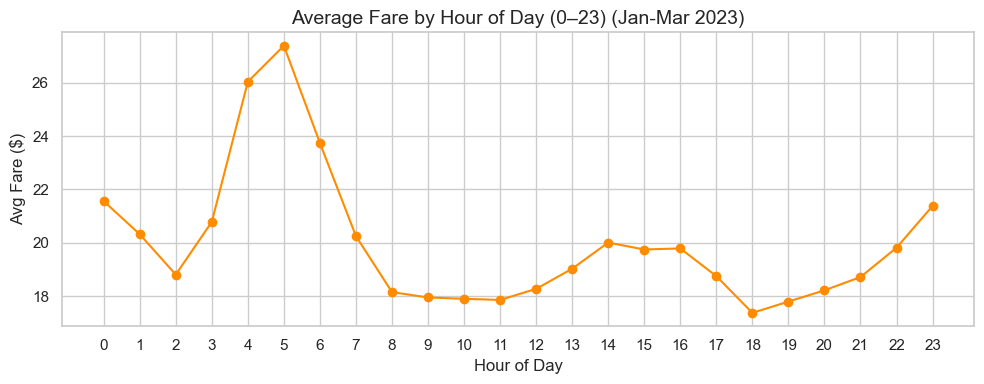

In [66]:
plt.figure(figsize=(10, 4))
plt.plot(hourly_avg["pickup_hour_of_day"], hourly_avg["avg_fare"], marker='o', color="darkorange")
plt.title("Average Fare by Hour of Day (0–23) (Jan-Mar 2023)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Avg Fare ($)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Hourly trend – average tip**

This chart shows the average tip amount for each hour in the dataset.
Full hourly timestamps allow for visualizing how tip behavior varies over time.

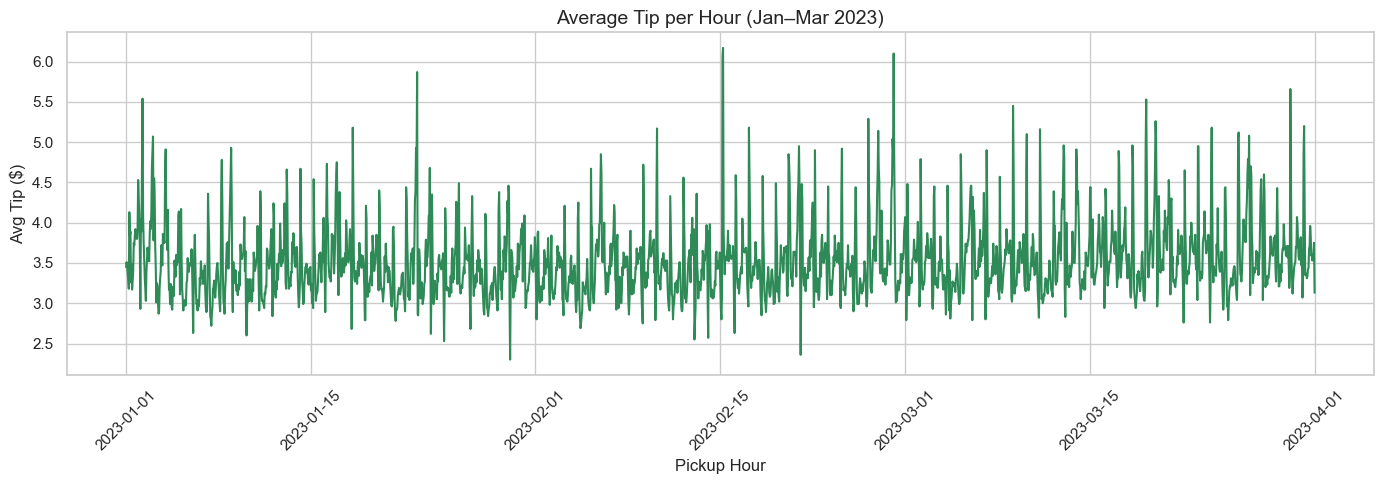

In [67]:
plt.figure(figsize=(14, 5))
plt.plot(df["pickup_hour"], df["avg_tip"], color="seagreen")
plt.title("Average Tip per Hour (Jan–Mar 2023)", fontsize=14)
plt.xlabel("Pickup Hour", fontsize=12)
plt.ylabel("Avg Tip ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Average tip by hour of day**

This chart displays the average tip amount for each hour in a typical day, aggregated across the dataset.

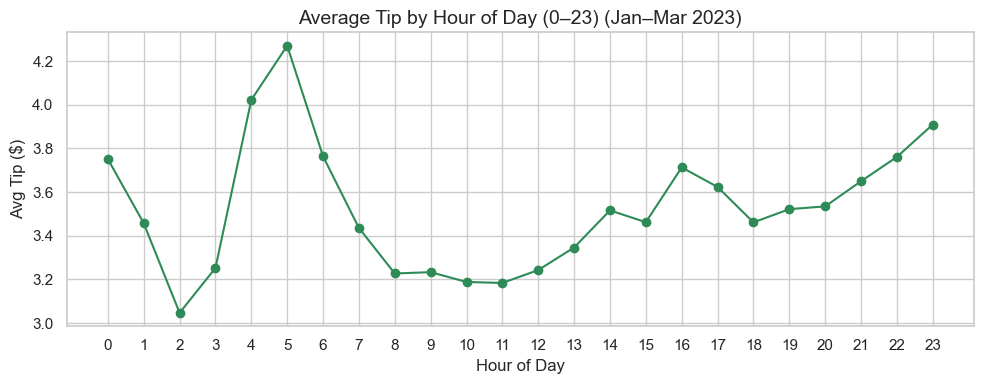

In [68]:
plt.figure(figsize=(10, 4))
plt.plot(hourly_avg["pickup_hour_of_day"], hourly_avg["avg_tip"], marker='o', color="seagreen")
plt.title("Average Tip by Hour of Day (0–23) (Jan–Mar 2023)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Avg Tip ($)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Hourly trend – total passengers**
This chart displays the total number of passengers per pickup hour across the dataset.  
It reflects changes in overall ride volume during the January to March 2023 period.

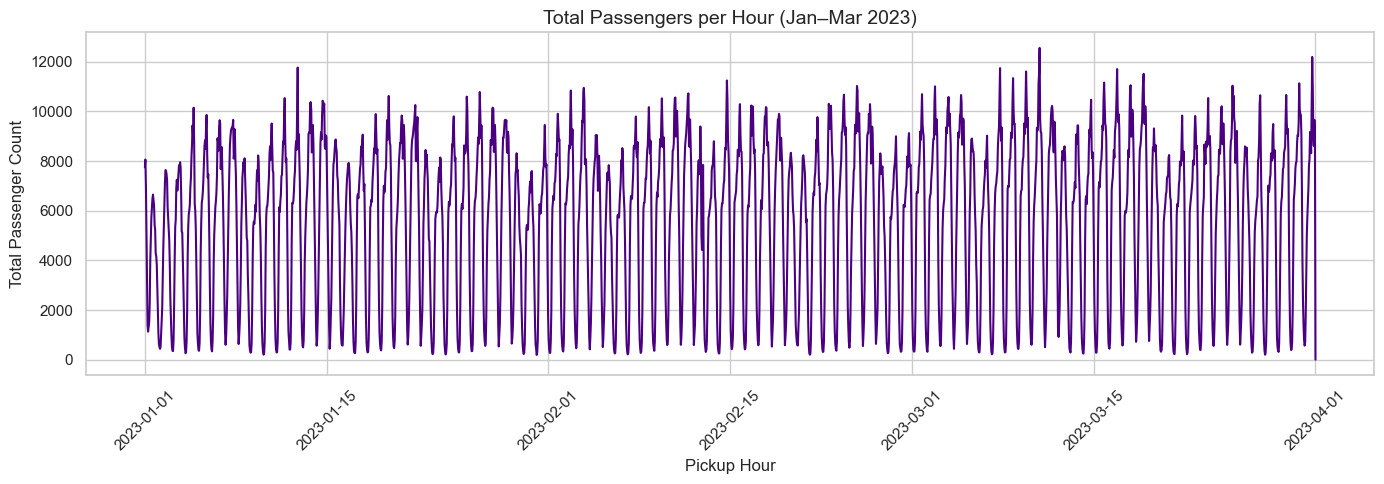

In [69]:
plt.figure(figsize=(14, 5))
plt.plot(df["pickup_hour"], df["total_passengers"], color="indigo")
plt.title("Total Passengers per Hour (Jan–Mar 2023)", fontsize=14)
plt.xlabel("Pickup Hour", fontsize=12)
plt.ylabel("Total Passenger Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Average passenger count by hour of day**

This chart shows the average number of passengers per hour, averaged across the available records in the dataset.

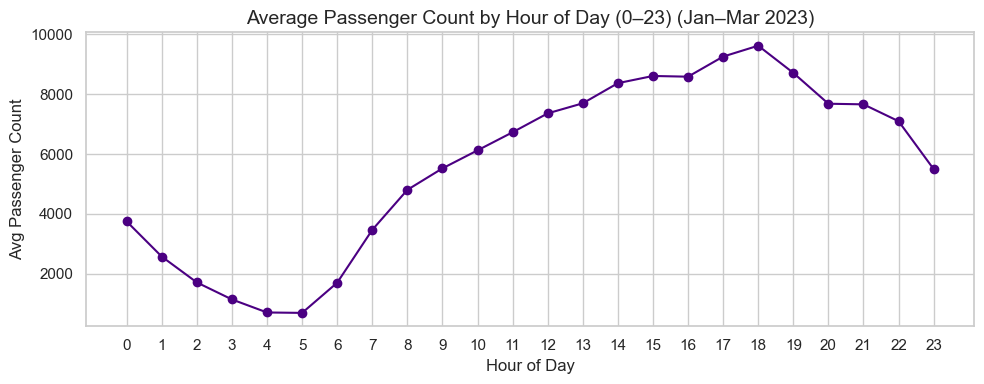

In [70]:
plt.figure(figsize=(10, 4))
plt.plot(hourly_avg["pickup_hour_of_day"], hourly_avg["total_passengers"], marker='o', color="indigo")
plt.title("Average Passenger Count by Hour of Day (0–23) (Jan–Mar 2023)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Avg Passenger Count", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Hourly trend – average trip distance** 
This plot shows the average trip distance in miles, calculated for each pickup hour using the full timestamp.

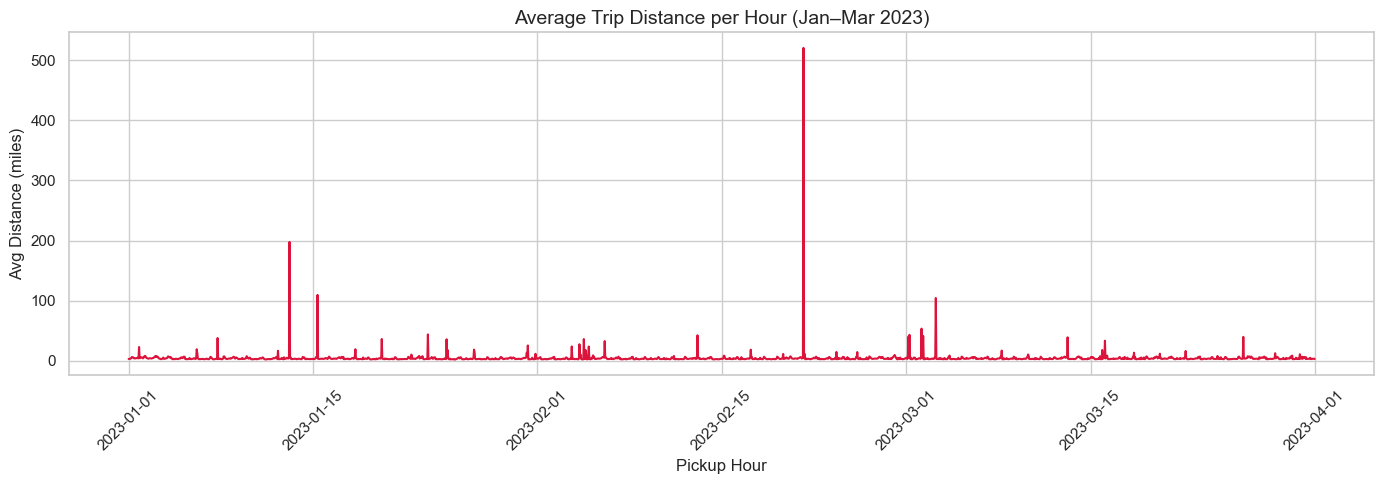

In [71]:
plt.figure(figsize=(14, 5))
plt.plot(df["pickup_hour"], df["avg_distance"], color="crimson")
plt.title("Average Trip Distance per Hour (Jan–Mar 2023)", fontsize=14)
plt.xlabel("Pickup Hour", fontsize=12)
plt.ylabel("Avg Distance (miles)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Average trip distance by hour of day**

This plot shows the average trip distance in miles, grouped by hour of the day across the full dataset.

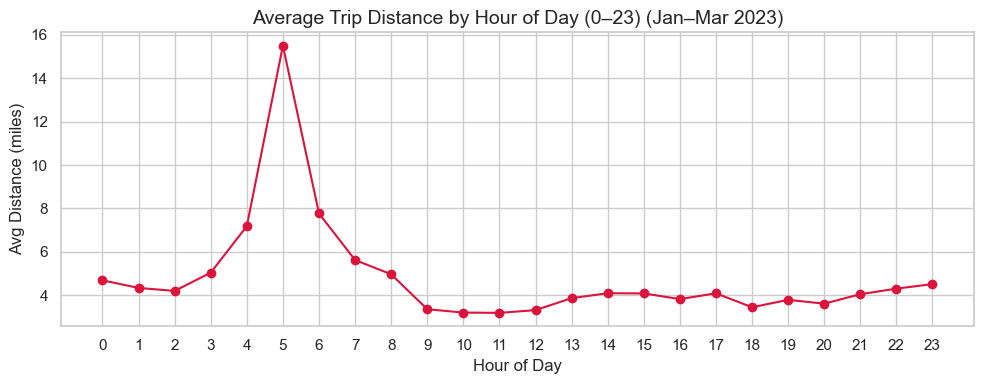

In [72]:
plt.figure(figsize=(10, 4))
plt.plot(hourly_avg["pickup_hour_of_day"], hourly_avg["avg_distance"], marker='o', color="crimson")
plt.title("Average Trip Distance by Hour of Day (0–23) (Jan–Mar 2023)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Avg Distance (miles)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

### Summary

This notebook explored hourly patterns in NYC Yellow Taxi data from January to March 2023.  
We analyzed trip volume, fare amounts, trip durations, tips, passenger counts, and travel distances — both over time and by hour of day.

The trends reveal consistent daily rhythms in ridership, fare surges during late nights, and duration peaks around afternoon hours. These patterns offer useful context for planning dashboards, peak-hour pricing, or operational optimizations.